In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
df_merged = pd.read_csv('merged_PhilWeather.csv', low_memory=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678842 entries, 0 to 1678841
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1678842 non-null  int64  
 1   duration             1678842 non-null  int64  
 2   start_time           1678842 non-null  object 
 3   end_time             1678842 non-null  object 
 4   start_station        1678842 non-null  int64  
 5   end_station          1678842 non-null  int64  
 6   bike_id              1678842 non-null  object 
 7   plan_duration        1678842 non-null  int64  
 8   trip_route_category  1678842 non-null  object 
 9   passholder_type      1678842 non-null  object 
 10  bike_type            1678842 non-null  object 
 11  Date_s               1678842 non-null  object 
 12  Weekday_s            1678842 non-null  int64  
 13  Hour_s               1678842 non-null  int64  
 14  Date_e               1678842 non-null  object 
 15

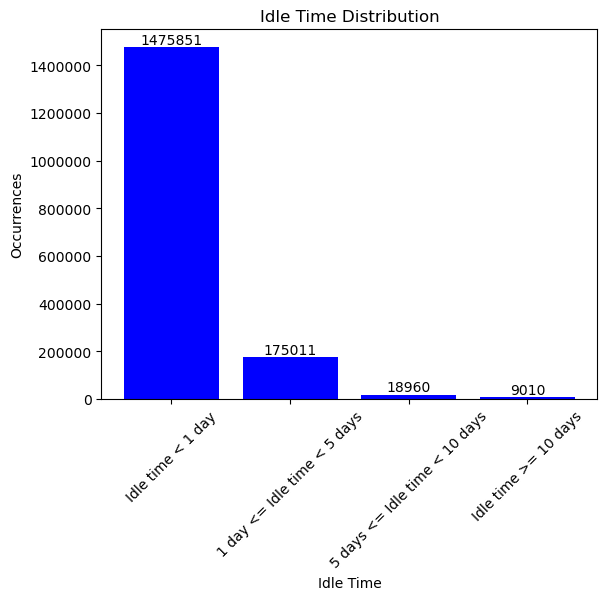

In [4]:
# Define the conditions for filtering
condition_1 = df_merged['idle_time_minutes'] < 1440
condition_2 = (df_merged['idle_time_minutes'] >= 1440) & (df_merged['idle_time_minutes'] < 7200)
condition_3 = (df_merged['idle_time_minutes'] >= 7200) & (df_merged['idle_time_minutes'] < 14400)
condition_4 = df_merged['idle_time_minutes'] >= 14400

# Apply the conditions and count the occurrences
count_1 = df_merged[condition_1].shape[0]
count_2 = df_merged[condition_2].shape[0]
count_3 = df_merged[condition_3].shape[0]
count_4 = df_merged[condition_4].shape[0]

categories = ['Idle time < 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
counts = [count_1, count_2, count_3, count_4]

plt.bar(categories, counts, color='b')
plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

In [6]:
merg['bike_id'].dtype

dtype('O')

In [10]:
merg[merg['bike_id'] == '3289']

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,...,end_coordinates,idle_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,idle_time_minutes
127,365198537,11,2021-01-01 11:25:00,2021-01-01 11:36:00,3116,3012,3289,365,One Way,Indego365,...,"39.942181,-75.177467",1 days 02:49:00,-2.0,30.0,Partly Cloudy,1032.94,6.0,0.0,-2.0,1609.0
874,365258430,7,2021-01-02 14:25:00,2021-01-02 14:32:00,3012,3163,3289,30,One Way,Indego30,...,"39.949741,-75.180969",0 days 01:17:00,8.0,30.0,Partly Cloudy,1011.61,15.0,0.0,6.0,77.0
1071,365261890,48,2021-01-02 15:49:00,2021-01-02 16:37:00,3163,3163,3289,1,Round Trip,Day Pass,...,"39.949741,-75.180969",1 days 15:38:00,12.0,28.0,Mostly Cloudy,1012.29,28.0,0.0,12.0,2378.0
2030,365361027,8,2021-01-04 08:15:00,2021-01-04 08:23:00,3163,3014,3289,30,One Way,Indego30,...,"39.958858,-75.173691",0 days 08:14:00,2.0,26.0,Cloudy,1014.32,11.0,0.0,-1.0,494.0
2538,365373128,6,2021-01-04 16:37:00,2021-01-04 16:43:00,3014,3182,3289,30,One Way,Indego30,...,"39.950809,-75.169533",5 days 02:55:00,5.0,26.0,Cloudy,1015.34,17.0,0.0,1.0,7375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668862,576921425,43,2022-12-20 19:49:00,2022-12-20 20:32:00,3245,3245,3289,30,Round Trip,Indego30,...,"39.97887,-75.157768",0 days 00:12:00,5.0,34.0,Fair,1028.88,15.0,0.0,2.0,12.0
1668929,576932650,40,2022-12-20 20:44:00,2022-12-20 21:24:00,3245,3210,3289,30,One Way,Indego30,...,"39.984921,-75.156677",0 days 00:01:00,4.0,34.0,Fair,1029.56,13.0,0.0,1.0,1.0
1668972,576932606,21,2022-12-20 21:25:00,2022-12-20 21:46:00,3210,3245,3289,30,One Way,Indego30,...,"39.97887,-75.157768",0 days 10:26:00,4.0,29.0,Partly Cloudy,1029.90,11.0,0.0,1.0,626.0
1669261,577042144,7,2022-12-21 08:12:00,2022-12-21 08:19:00,3245,3065,3289,30,One Way,Indego30,...,"39.970699,-75.151711",7 days 09:06:00,-2.0,33.0,Fair,1031.93,7.0,0.0,-6.0,10626.0


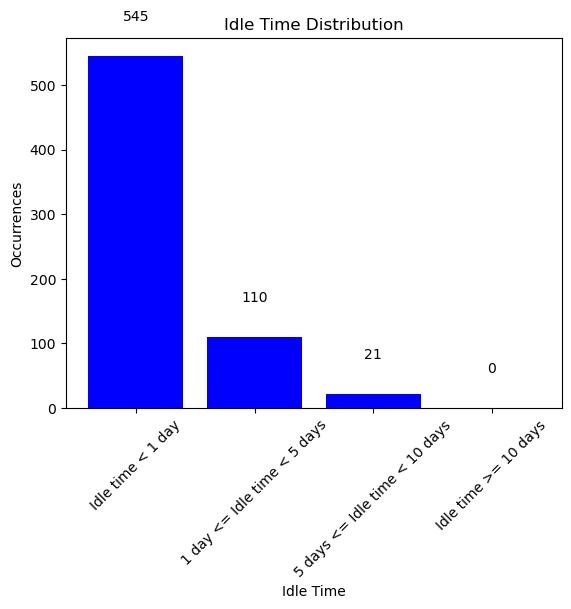

In [17]:
# Define the conditions for filtering
condition_1 = (merg['idle_time_minutes'] < 1440) & (merg['bike_id'] == '3289')
condition_2 = (merg['idle_time_minutes'] >= 1440) & (merg['idle_time_minutes'] < 7200) & (merg['bike_id'] == '3289')
condition_3 = (merg['idle_time_minutes'] >= 7200) & (merg['idle_time_minutes'] < 14400) & (merg['bike_id'] == '3289')
condition_4 = (merg['idle_time_minutes'] >= 14400*3) & (merg['bike_id'] == '3289')

# Apply the conditions and count the occurrences
count_1 = merg[condition_1].shape[0]
count_2 = merg[condition_2].shape[0]
count_3 = merg[condition_3].shape[0]
count_4 = merg[condition_4].shape[0]

categories = ['Idle time < 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
counts = [count_1, count_2, count_3, count_4]

plt.bar(categories, counts, color='b')
plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

In [8]:
df_merged['Date_s'] = pd.to_datetime(df_merged['Date_s'])

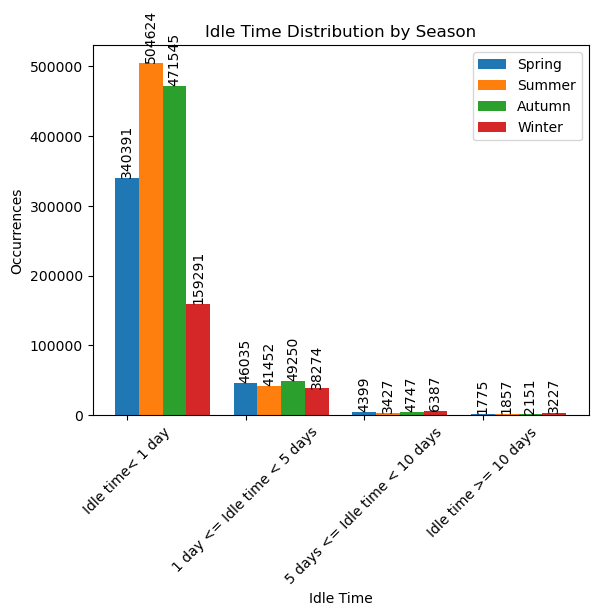

In [10]:
condition_labels = ['Idle time< 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
conditions = [condition_1, condition_2, condition_3, condition_4]

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df_merged['season'] = df_merged['Date_s'].dt.month.map(get_season)

# Create a list to store the counts for each combination of condition and season
counts_matrix = []

# Calculate the counts for each combination
for condition in conditions:
    counts_per_condition = []
    for season in seasons:
        count = df_merged[condition & (df_merged['season'] == season)].shape[0]
        counts_per_condition.append(count)
    counts_matrix.append(counts_per_condition)

# Convert the list of counts to a NumPy array for plotting
counts_matrix = np.array(counts_matrix)

# Create the grouped bar plot
bar_width = 0.2
x = list(range(len(seasons)))  # Convert the range object to a list

for i, season in enumerate(seasons):
    plt.bar([pos + i * bar_width for pos in x], counts_matrix[:, i], width=bar_width, label=season)
    for j, count in enumerate(counts_matrix[:, i]):
        plt.text(j + i * bar_width, count + 50, str(count), ha='center', va='bottom', rotation=90)

plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution by Season')
plt.xticks(x, condition_labels, rotation=45)
plt.legend()

plt.show()

In [12]:
df_merged['passholder_indego'] = np.where((df_merged['passholder_type'] == 'Indego30') | (df_merged['passholder_type'] == 'Indego365'), 1, 0)

In [13]:
df_merged.groupby("passholder_indego")["idle_time_minutes"].mean()

passholder_indego
0    954.766782
1    856.161182
Name: idle_time_minutes, dtype: float64

<Axes: >

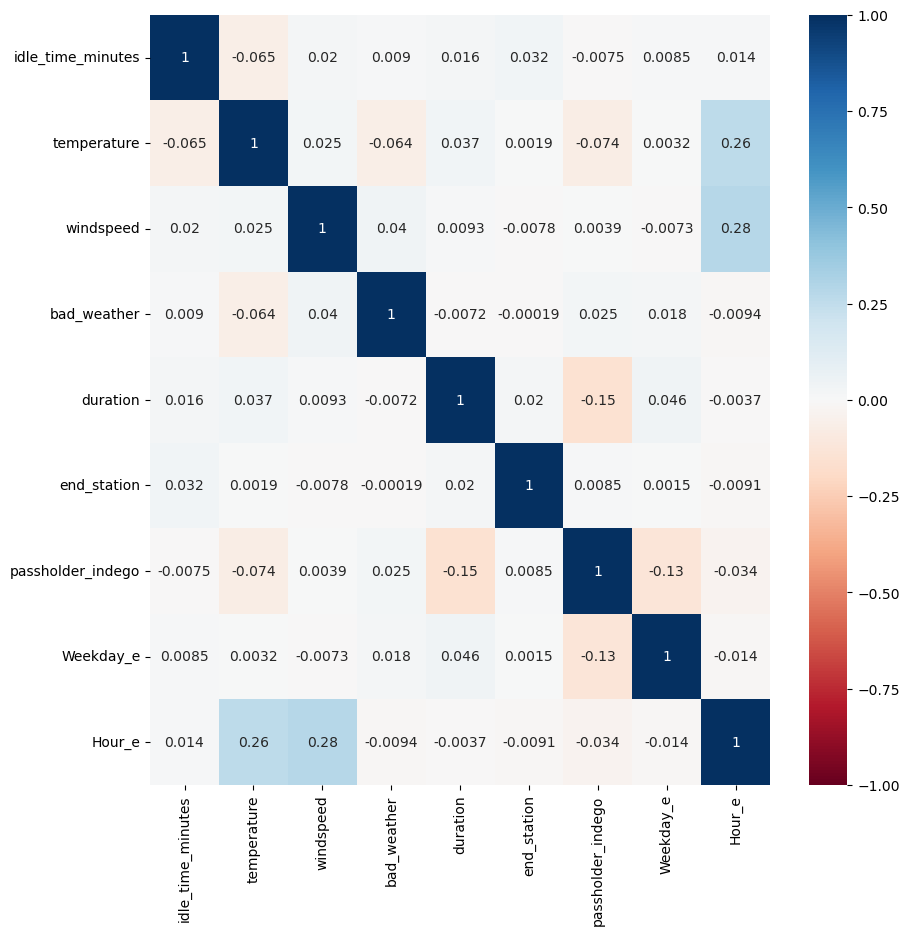

In [47]:
features = df_merged[['idle_time_minutes','temperature', 'windspeed', 'bad_weather', 'duration','end_station',
                'passholder_indego', 'Weekday_e','Hour_e']]
corr = features.corr()
# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [48]:
df_merged.dropna(subset=['idle_time_minutes'], inplace=True)

The null hypothesis (H0) for the t-test is that there is no difference in the mean idle time between 'Indego30'/'Indego365' passholders and other passholders. The alternative hypothesis (H1) is that there is a significant difference in the mean idle time.

If the p-value obtained from the t-test is less than the chosen significance level (alpha), we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean idle time between 'Indego30'/'Indego365' passholders and other passholders. This suggests that 'passholder_type' is important in predicting idle time, and the 'Indego30'/'Indego365' passholders have significantly different idle time patterns compared to other passholders.

In [49]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
indego_idle_time = df_merged[df_merged['passholder_indego'] == 1]['idle_time_minutes']
non_indego_idle_time = df_merged[df_merged['passholder_indego'] == 0]['idle_time_minutes']

t_stat, p_value = ttest_ind(indego_idle_time, non_indego_idle_time)

# Print the results
alpha = 0.05
print("Independent Samples t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < alpha:
    print("H0 is rejected, which means that the idle time for Indego passholder statistically greater than that for Non-Indego passholder")
else:
    print("H0 can not be rejected")

Independent Samples t-test:
t-statistic: -9.779710350493227
p-value: 1.3779523967059914e-22
H0 is rejected, which means that the idle time for Indego passholder statistically greater than that for Non-Indego passholder


In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678832 entries, 0 to 1678841
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   trip_id              1678832 non-null  int64         
 1   duration             1678832 non-null  int64         
 2   start_time           1678832 non-null  datetime64[ns]
 3   end_time             1678832 non-null  datetime64[ns]
 4   start_station        1678832 non-null  int64         
 5   end_station          1678832 non-null  int64         
 6   bike_id              1678832 non-null  object        
 7   plan_duration        1678832 non-null  int64         
 8   trip_route_category  1678832 non-null  object        
 9   passholder_type      1678832 non-null  object        
 10  bike_type            1678832 non-null  object        
 11  Date_s               1678832 non-null  datetime64[ns]
 12  Weekday_s            1678832 non-null  int64         
 1

In [51]:
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])
df_merged['end_time'] = pd.to_datetime(df_merged['end_time'])
df_merged['Date_e'] = pd.to_datetime(df_merged['Date_e'])

In [52]:

# duration ? how 
# end_station logisch // average usage, popularity

# bike availability at end station 


In [53]:
df_merged.groupby(df_merged['Weekday_s'] > 4)['idle_time_minutes'].mean()

Weekday_s
False    845.993811
True     916.869697
Name: idle_time_minutes, dtype: float64

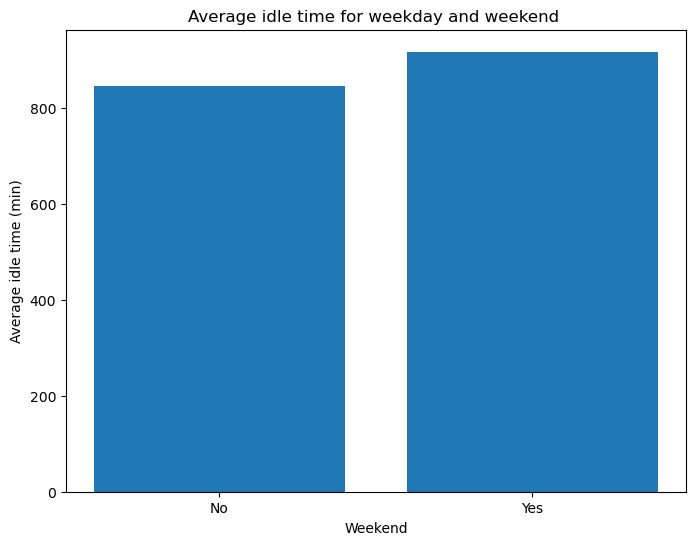

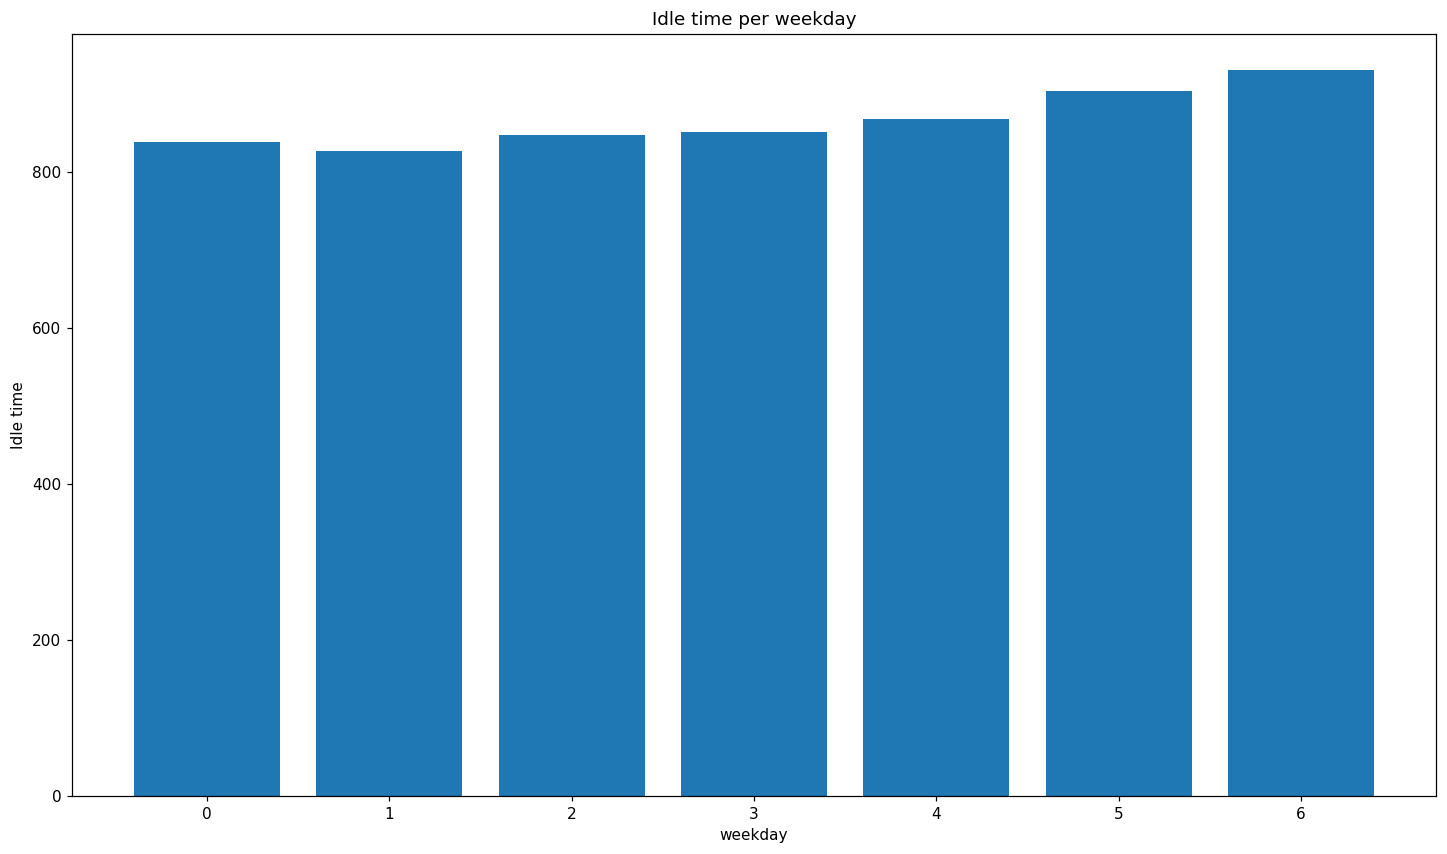

In [54]:
avg_idle_time = df_merged.groupby(df_merged['Weekday_s'] > 4)['idle_time_minutes'].mean()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_idle_time.index, avg_idle_time)

ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Weekend")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for weekday and weekend ")

plt.show()

weekday = df_merged.groupby(df_merged['Weekday_e'])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(weekday.index, weekday)
plt.title("Idle time per weekday")
plt.xlabel("weekday")
plt.ylabel("Idle time")

plt.show()

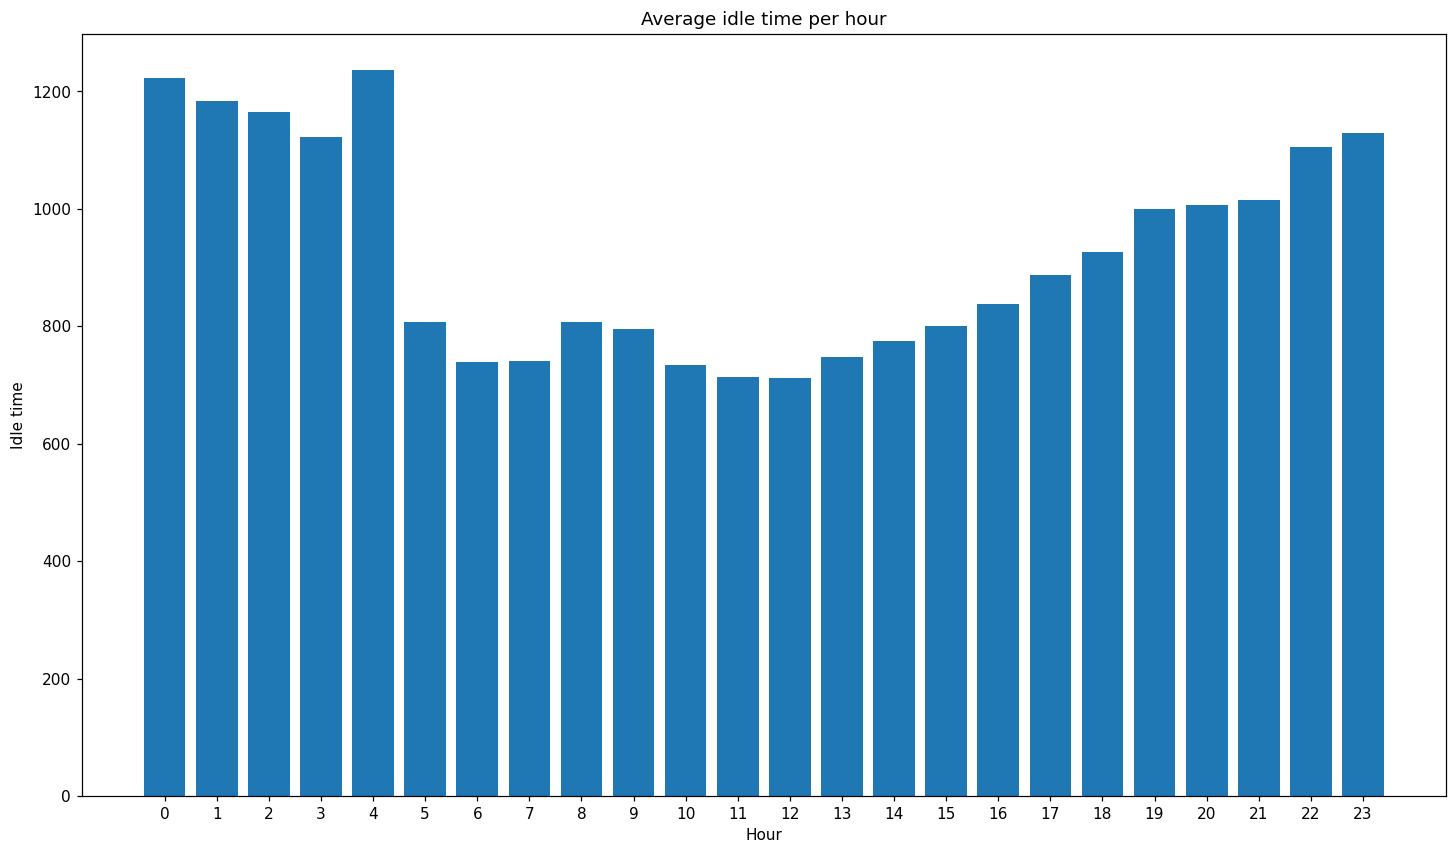

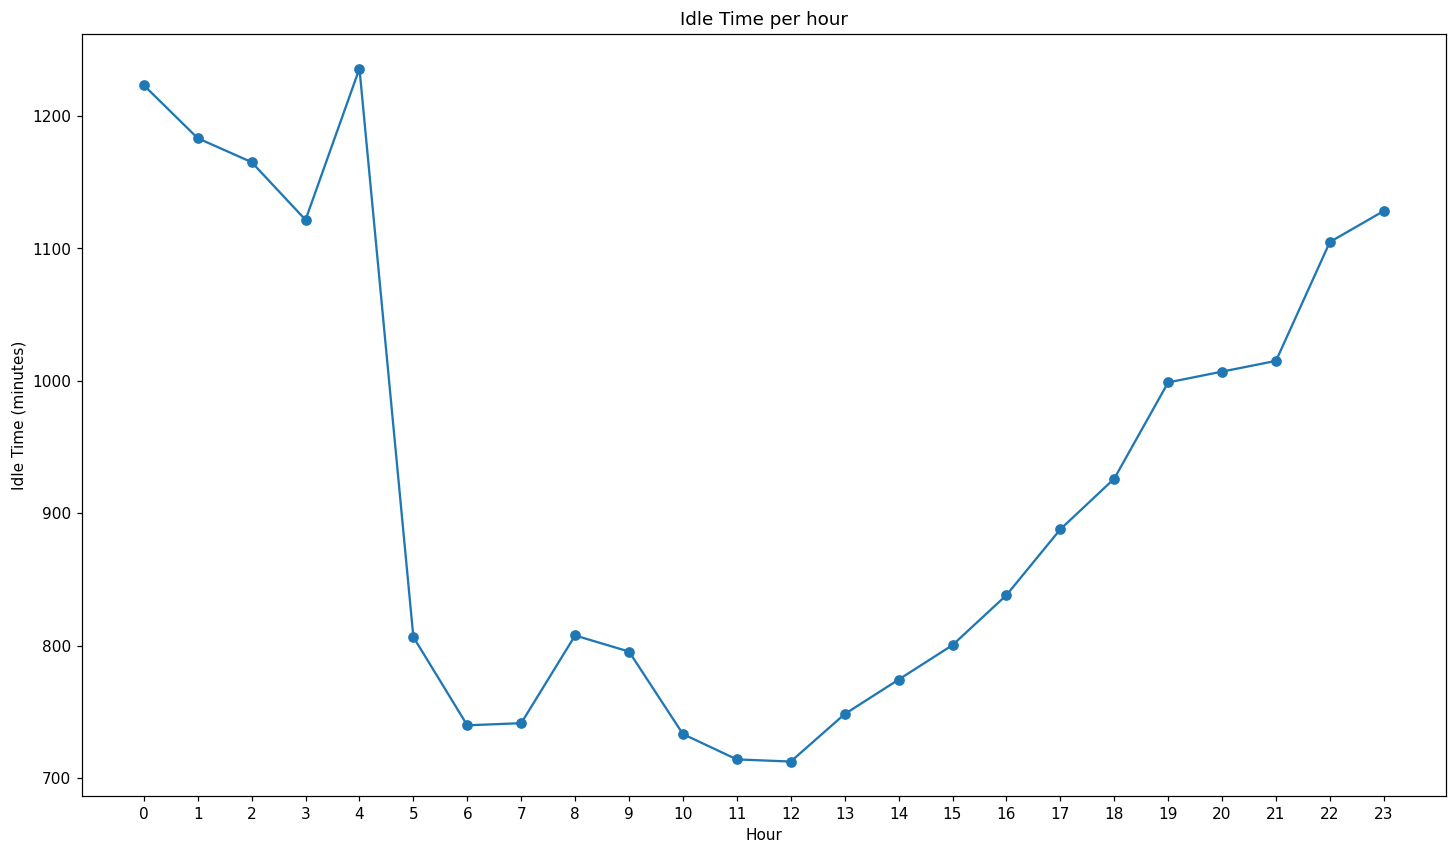

In [58]:
hour = df_merged.groupby(df_merged['Hour_e'])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(hour.index, hour)
plt.title("Average idle time per hour")
plt.xlabel("Hour")
plt.xticks(range(0, 24, 1))
plt.ylabel("Idle time")

plt.show()

fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.plot(hour.index, hour, marker='o', linestyle='-')
plt.title("Idle Time per hour")
plt.xlabel("Hour")
plt.xticks(range(0, 24, 1))
plt.ylabel("Idle Time (minutes)")

plt.show()

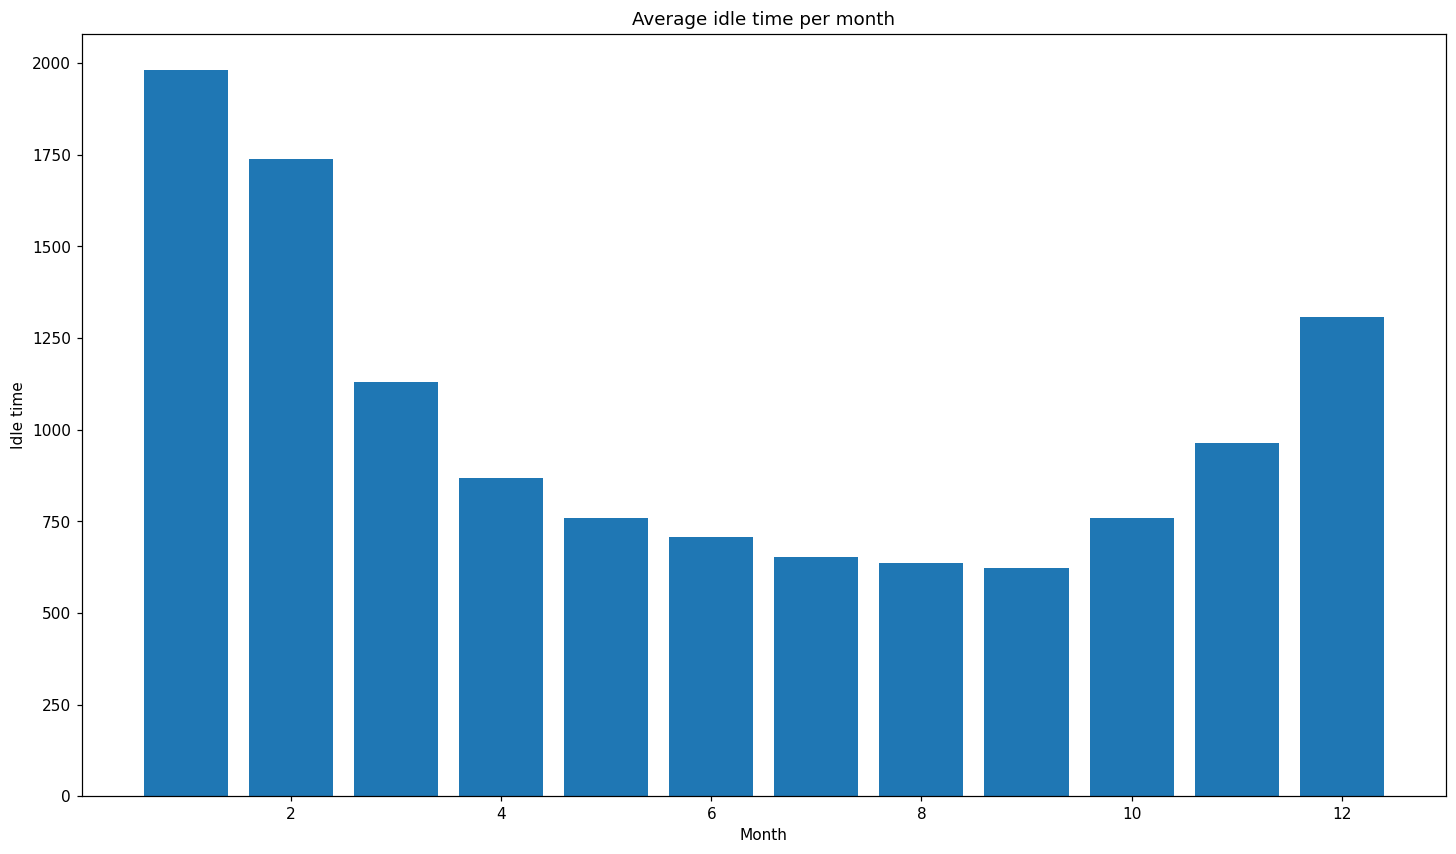

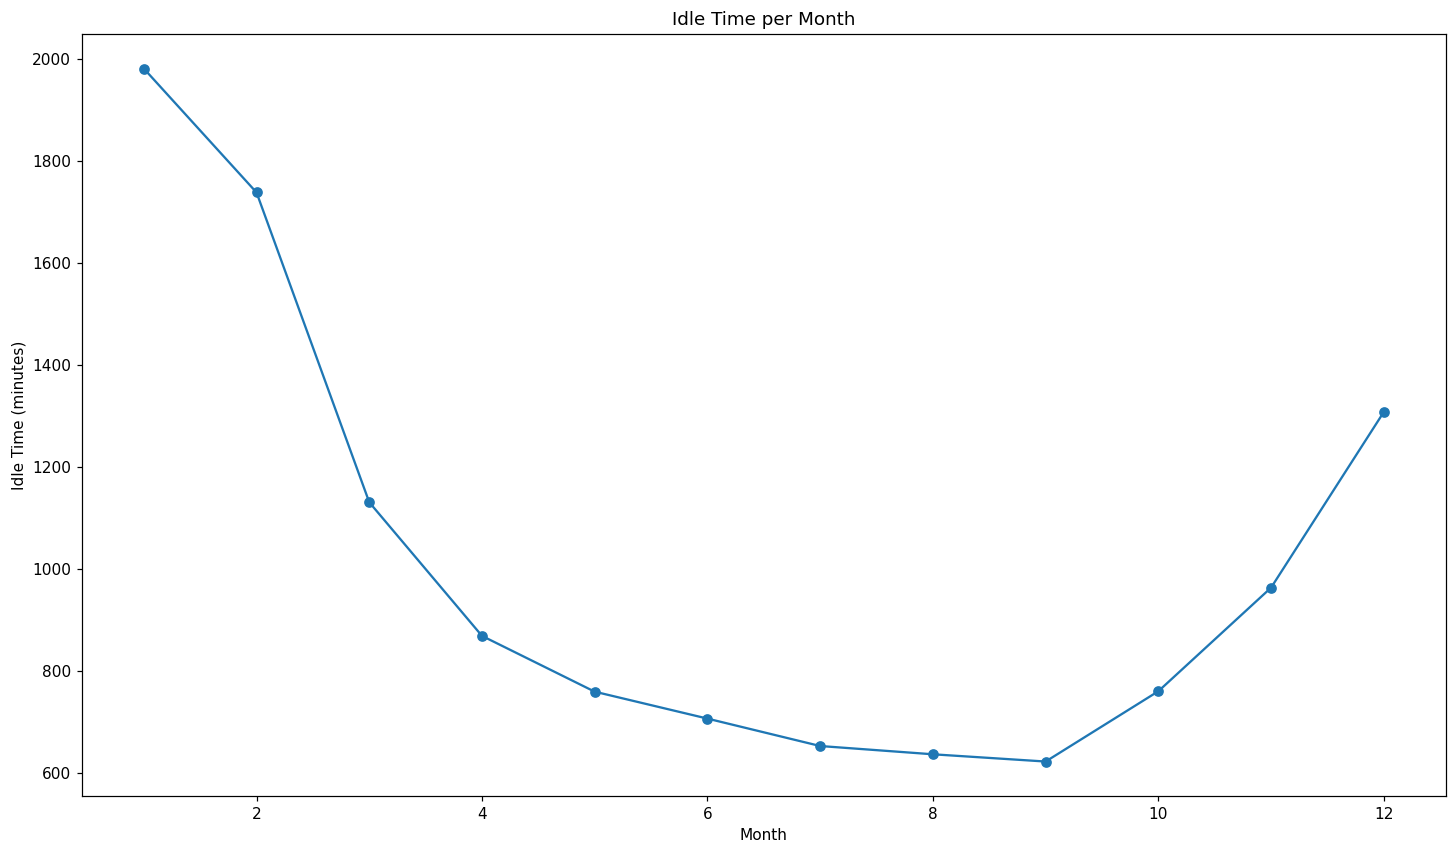

In [56]:
month = df_merged.groupby(df_merged['Date_s'].dt.month)['idle_time_minutes'].mean()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(month.index, month)
plt.title("Average idle time per month")
plt.xlabel("Month")
plt.ylabel("Idle time")

plt.show()

fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.plot(month.index, month, marker='o', linestyle='-')
plt.title("Idle Time per Month")
plt.xlabel("Month")
plt.ylabel("Idle Time (minutes)")

plt.show()

- we discard weekday as an independent variable
- we consider month and hour as a selectable independent variable

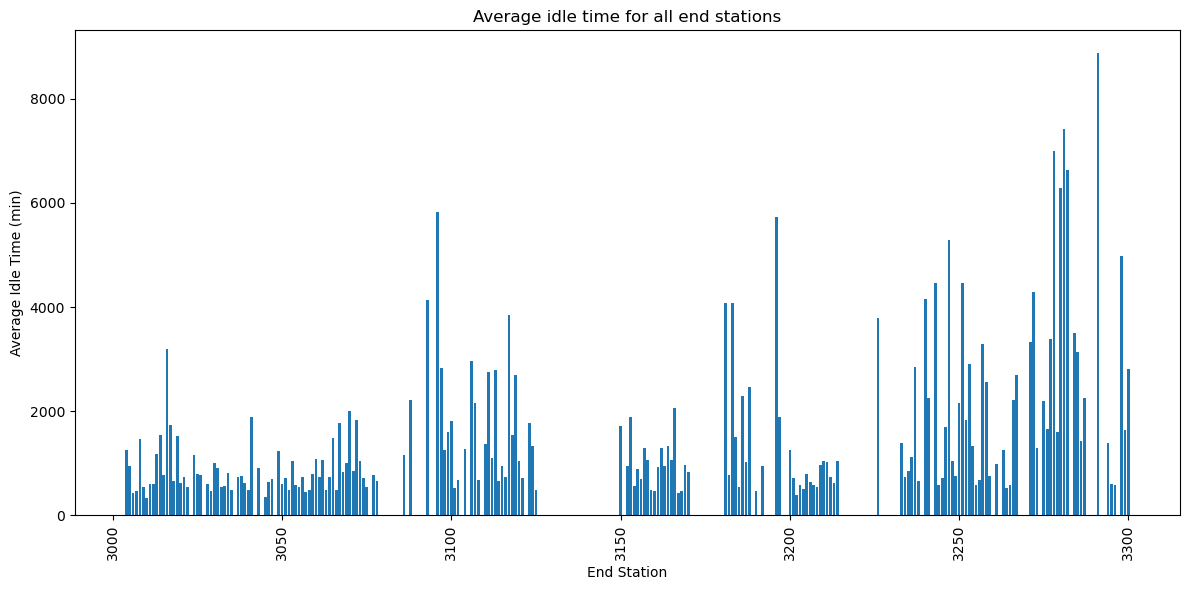

In [62]:
average_idle_time_by_station = df_merged.groupby("end_station")["idle_time_minutes"].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_idle_time_by_station.index, average_idle_time_by_station)
plt.xlabel("End Station")
plt.ylabel("Average Idle Time (min)")
plt.title("Average idle time for all end stations")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [66]:
stations_under_1440 = average_idle_time_by_station[average_idle_time_by_station < 1440]

# Display the filtered stations
print(len(stations_under_1440))

132
